<a href="https://colab.research.google.com/github/EstebanPerez25/Proyecto-Final-IDM/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

Table `iar_reservaciones`

**Conversion of csv to parquet file**

In [1]:
# import pandas as pd

# raw_df = pd.read_csv('reservaciones.csv')
# raw_df.to_parquet('reservaciones.parquet')

### Libraries

pip install ydata_profiling

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

# Data profiling
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file


c:\Users\Esteban\Documents\. Clases_Tec\8. Octavo semestre\_Proyecto\kProject\tcaproject\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load data

In [4]:
%load_ext kedro.ipython

[05/25/25 18:54:22] INFO     Using 'c:\Users\Esteban\Documents\. Clases_Tec\8. Octavo               __init__.py:272
                             semestre\_Proyecto\kProject\tcaproject\.venv\Lib\site-packages\kedro\f                
                             ramework\project\rich_logging.yml' as logging configuration.                          

                    INFO     Registered line magic '%reload_kedro'                                   __init__.py:63

                    INFO     Registered line magic '%load_node'                                      __init__.py:65

                    INFO     Resolved project path as: c:\Users\Esteban\Documents\. Clases_Tec\8.   __init__.py:180
                             Octavo semestre\_Proyecto\kProject\tcaproject.                                        
                             To set a different path, run '%reload_kedro <project_root>'                           

[05/25/25 18:54:24] INFO     Kedro is sending anonymous usage data with the sole purpose of improving plugin.py:233
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[05/25/25 18:54:25] INFO     Kedro project tcaProject                                               __init__.py:146

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:147
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        __init__.py:153

Run each time catalog.yml was updated

In [7]:
%reload_kedro

[05/25/25 18:58:11] INFO     Resolved project path as: C:\Users\Esteban\Documents\. Clases_Tec\8.   __init__.py:180
                             Octavo semestre\_Proyecto\kProject\tcaproject.                                        
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving plugin.py:233
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[05/25/25 18:58:12] INFO     Kedro project tcaProject                                               __init__.py:146

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:147
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        __init__.py:153

In [8]:
raw_df = catalog.load("reservaciones")  # type: ignore # noqa: F821
raw_df.head()

[05/25/25 18:58:15] INFO     Loading data from reservaciones (ParquetDataset)...                data_catalog.py:403

,id_reservaciones,fecha_hoy,fecha_reservacion,fecha_llegada,fecha_salida,numero_personas,numero_personas_anio_anterior,numero_adultos,numero_adultos_anio_anterior,numero_menores,...,nombre_estatus_reservacion,clave_estado,nombre_estado,total_tarifa,id_moneda,fecha_ultimo_cambio,reservacion,reservacion_anio_anterior,id_cliente_disp,cliente_disp_anio_anterior
0,0,16/08/2019,16/08/2019,07/11/2019,10/11/2019,2,0,2,0,0,...,SALIDA,EMX,MÉXICO,2659.98,1,10/11/2019,1,0,2,0
1,1,22/10/2019,22/10/2019,01/12/2019,05/12/2019,4,0,4,0,0,...,SALIDA,EGT,GUANAJUATO,1764.00,1,05/12/2019,1,0,4,0
2,2,28/10/2019,28/10/2019,01/12/2019,05/12/2019,2,0,2,0,0,...,SALIDA,EMC,MICHOACÁN,2660.04,1,05/12/2019,1,0,2,0
3,3,28/10/2019,28/10/2019,08/12/2019,11/12/2019,4,0,3,0,0,...,SALIDA,EGT,GUANAJUATO,1995.03,1,11/12/2019,1,0,3,0
4,4,28/10/2019,28/10/2019,08/12/2019,12/12/2019,2,0,2,0,0,...,SALIDA,EMX,MÉXICO,13369.92,1,12/12/2019,1,0,2,0


In [9]:
raw_df.shape

(203002, 49)

## Basic data preprocessing

In [10]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203002 entries, 0 to 203001
Data columns (total 49 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id_reservaciones                  203002 non-null  int64  
 1   fecha_hoy                         203002 non-null  object 
 2   fecha_reservacion                 203002 non-null  object 
 3   fecha_llegada                     203000 non-null  object 
 4   fecha_salida                      202968 non-null  object 
 5   numero_personas                   203002 non-null  int64  
 6   numero_personas_anio_anterior     203002 non-null  int64  
 7   numero_adultos                    203002 non-null  int64  
 8   numero_adultos_anio_anterior      203002 non-null  int64  
 9   numero_menores                    203002 non-null  int64  
 10  numero_menores_anio_anterior      203002 non-null  int64  
 11  numero_noches                     203002 non-null  i

### Correct datatypes

In [11]:
datatypes_df = raw_df.copy()

# Columns to datetime type
date_columns = ['fecha_hoy', 'fecha_reservacion',
                'fecha_llegada', 'fecha_salida',
                'fecha_ultimo_cambio']
# Columns to category type
categorical_columns = [
    # IDs
    'id_programa',
    'id_paquete',
    'id_segmento',
    'id_agencia',
    'id_empresa',
    'id_tipo_habitacion',
    'id_canal',
    'id_pais_origen',
    'id_estatus_reservacion',
    'id_moneda',
    'id_cliente_disp',

    # Variables nominales/texto
    'nombre_programa',
    'nombre_paquete',
    'nombre_segmento',
    'nombre_agencia',
    'ciudad_agencia',
    'entidad_federativa_agencia',
    'pais_agencia',
    'nombre_empresa',
    'nombre_tipo_habitacion',
    'clasificacion_tipo_habitacion',
    'nombre_canal',
    'nombre_pais_origen',
    'nombre_estatus_reservacion',
    'clave_estado',
    'nombre_estado'
]

# Columns to binary type
bool_columns = ['reservacion_pendiente',
                'reservacion',
                'reservacion_anio_anterior']


# for column in date_columns:
#   datatypes_df[column] = pd.to_datetime(raw_df[column],
#                                         errors='coerce',
#                                         dayfirst=True )

datatypes_df[date_columns] = raw_df[date_columns].astype('datetime64[ns]')
datatypes_df[categorical_columns] = raw_df[categorical_columns].astype('category')
datatypes_df[bool_columns] = raw_df[bool_columns].astype('bool')

# Numeric columns
numeric_columns = datatypes_df.select_dtypes(include=['int64', 'float64']).columns


datatypes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203002 entries, 0 to 203001
Data columns (total 49 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   id_reservaciones                  203002 non-null  int64         
 1   fecha_hoy                         203002 non-null  datetime64[ns]
 2   fecha_reservacion                 203002 non-null  datetime64[ns]
 3   fecha_llegada                     203000 non-null  datetime64[ns]
 4   fecha_salida                      202968 non-null  datetime64[ns]
 5   numero_personas                   203002 non-null  int64         
 6   numero_personas_anio_anterior     203002 non-null  int64         
 7   numero_adultos                    203002 non-null  int64         
 8   numero_adultos_anio_anterior      203002 non-null  int64         
 9   numero_menores                    203002 non-null  int64         
 10  numero_menores_anio_anterior    

**Capitalize string columns**

In [12]:
capitalized_df = datatypes_df.copy()

def capitalize_words(text):
  if isinstance(text, str):
    words = text.split()
    capitalized_words = [word.capitalize() for word in words]
    return " ".join(capitalized_words)
  return text

# Apply the function to string columns
for col in datatypes_df.select_dtypes(include='category').columns:
  capitalized_df[col] = datatypes_df[col].apply(capitalize_words)

# Visualize capitalized columns
capitalized_df[capitalized_df.select_dtypes(include='category').columns].head()

,id_programa,nombre_programa,id_paquete,nombre_paquete,id_segmento,nombre_segmento,id_agencia,nombre_agencia,ciudad_agencia,entidad_federativa_agencia,...,id_canal,nombre_canal,id_pais_origen,nombre_pais_origen,id_estatus_reservacion,nombre_estatus_reservacion,clave_estado,nombre_estado,id_moneda,id_cliente_disp
0,1,Ninguno,1,Walk In,14,Individual Ep/vac. Club,112,Hoteles S.a.,Mexico City,México,...,10,Multivacaciones 2,157,Mexico,9,Salida,Emx,México,1,2
1,1,Ninguno,2,Ninguno,14,Individual Ep/vac. Club,112,Hoteles S.a.,Mexico City,México,...,10,Multivacaciones 2,157,Mexico,9,Salida,Egt,Guanajuato,1,4
2,1,Ninguno,1,Walk In,14,Individual Ep/vac. Club,112,Hoteles S.a.,Mexico City,México,...,10,Multivacaciones 2,157,Mexico,9,Salida,Emc,Michoacán,1,2
3,1,Ninguno,2,Ninguno,14,Individual Ep/vac. Club,112,Hoteles S.a.,Mexico City,México,...,10,Multivacaciones 2,157,Mexico,9,Salida,Egt,Guanajuato,1,3
4,1,Ninguno,1,Walk In,5,Ecommerce Ota Domestic,14,Bestday Travel Group,Cancún,Quintana Roo,...,13,Vertical Booking,157,Mexico,9,Salida,Emx,México,1,2


**Null values**

In [34]:
capitalized_df.isna().sum()


id_reservaciones                      0
fecha_hoy                             0
fecha_reservacion                     0
fecha_llegada                         2
fecha_salida                         34
numero_personas                       0
numero_personas_anio_anterior         0
numero_adultos                        0
numero_adultos_anio_anterior          0
numero_menores                        0
numero_menores_anio_anterior          0
numero_noches                         0
numero_noches_anio_anterior           0
total_habitaciones                    0
total_habitaciones_anio_anterior      0
id_programa                           0
nombre_programa                       0
id_paquete                            0
nombre_paquete                        0
id_segmento                           0
nombre_segmento                       0
id_agencia                            0
nombre_agencia                        0
ciudad_agencia                        0
entidad_federativa_agencia            0

**Duplicated values**

In [9]:
capitalized_df.duplicated().sum()

np.int64(0)

Removing unique id to verify duplicates in other columns.

In [10]:
capitalized_df.drop('id_reservaciones', axis=1).duplicated().sum()

np.int64(75606)

In [11]:
capitalized_df[capitalized_df.drop('id_reservaciones', axis=1).duplicated()].head(8)

,id_reservaciones,fecha_hoy,fecha_reservacion,fecha_llegada,fecha_salida,numero_personas,numero_personas_anio_anterior,numero_adultos,numero_adultos_anio_anterior,numero_menores,...,nombre_estatus_reservacion,clave_estado,nombre_estado,total_tarifa,id_moneda,fecha_ultimo_cambio,reservacion,reservacion_anio_anterior,id_cliente_disp,cliente_disp_anio_anterior
17,17,2019-08-17,2019-08-17,2019-07-11,2019-10-11,2,0,2,0,0,...,Reservacion Cancelada,Egr,Guerrero,8088.0,1,2019-06-11,True,False,2,0
19,19,2019-08-17,2019-08-17,2019-07-11,2019-10-11,2,0,2,0,0,...,Reservacion Cancelada,Egr,Guerrero,8088.0,1,2019-06-11,True,False,2,0
20,20,2019-08-17,2019-08-17,2019-07-11,2019-10-11,2,0,2,0,0,...,Reservacion Cancelada,Egr,Guerrero,8088.0,1,2019-06-11,True,False,2,0
22,22,2019-08-17,2019-08-17,2019-08-11,2019-10-11,2,0,2,0,0,...,Salida,Emc,Michoacán,5392.0,1,2019-10-11,True,False,2,0
25,25,2019-08-17,2019-08-17,2019-08-11,2019-10-11,2,0,2,0,0,...,Salida,Emc,Michoacán,5392.0,1,2019-10-11,True,False,2,0
26,26,2019-08-17,2019-08-17,2019-08-11,2019-10-11,2,0,2,0,0,...,Salida,Emc,Michoacán,5392.0,1,2019-10-11,True,False,2,0
27,27,2019-08-17,2019-08-17,2019-08-11,2019-10-11,2,0,2,0,0,...,Salida,Emc,Michoacán,5392.0,1,2019-10-11,True,False,2,0
28,28,2019-08-17,2019-08-17,2019-08-11,2019-10-11,2,0,2,0,0,...,Salida,Emc,Michoacán,5392.0,1,2019-10-11,True,False,2,0


These records may be matches, not necessarily duplicate values.

## EDA

In [21]:
#capitalized_df.to_parquet('reservaciones_eda.parquet')
#df_eda = pd.read_parquet('reservaciones_eda.parquet')
df_eda = capitalized_df.copy()

numeric_columns = df_eda.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df_eda.select_dtypes(include=['category']).columns
bool_columns = df_eda.select_dtypes(include=['bool']).columns
date_columns = df_eda.select_dtypes(include=['datetime64[ns]']).columns

### Data Profiling

In [14]:
#profile_report = ProfileReport(df_eda, title="Reservaciones Profiling Report")

In [15]:
#profile_report.to_notebook_iframe()

In [16]:
#profile_report.to_file("Reservaciones_Profile_Report.html")

## EDA - Univariate

In [22]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203002 entries, 0 to 203001
Data columns (total 49 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   id_reservaciones                  203002 non-null  int64         
 1   fecha_hoy                         203002 non-null  datetime64[ns]
 2   fecha_reservacion                 203002 non-null  datetime64[ns]
 3   fecha_llegada                     203000 non-null  datetime64[ns]
 4   fecha_salida                      202968 non-null  datetime64[ns]
 5   numero_personas                   203002 non-null  int64         
 6   numero_personas_anio_anterior     203002 non-null  int64         
 7   numero_adultos                    203002 non-null  int64         
 8   numero_adultos_anio_anterior      203002 non-null  int64         
 9   numero_menores                    203002 non-null  int64         
 10  numero_menores_anio_anterior    

### Descriptive stats

In [23]:
df_eda.describe()

,id_reservaciones,fecha_hoy,fecha_reservacion,fecha_llegada,fecha_salida,numero_personas,numero_personas_anio_anterior,numero_adultos,numero_adultos_anio_anterior,numero_menores,numero_menores_anio_anterior,numero_noches,numero_noches_anio_anterior,total_habitaciones,total_habitaciones_anio_anterior,total_habitaciones_empresa,cupo_tipo_habitacion,total_tarifa,fecha_ultimo_cambio,cliente_disp_anio_anterior
count,203002.00000,203002,203002,203000,202968,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.000000,203002.0,202992.0,2.030020e+05,202505,203002.000000
mean,101500.50000,2020-02-26 00:45:45.620239872,2019-08-28 09:57:46.712643072,2019-11-01 22:33:56.855172352,2019-11-08 17:20:49.804895232,1.185865,1.170550,1.094708,1.079694,0.034108,0.033734,1.680028,1.656043,0.505581,0.498586,735.0,2.0,4.106728e+03,2019-10-08 05:21:16.324041728,1.079694
min,0.00000,2019-01-02 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-03 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,735.0,2.0,-3.091000e+04,2019-01-02 00:00:00,0.000000
25%,50750.25000,2019-08-03 00:00:00,2019-04-16 00:00:00,2019-06-07 00:00:00,2019-06-13 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,735.0,2.0,0.000000e+00,2019-06-04 00:00:00,0.000000
50%,101500.50000,2020-02-25 00:00:00,2019-08-03 00:00:00,2019-10-05 00:00:00,2019-10-13 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,735.0,2.0,0.000000e+00,2019-09-30 00:00:00,0.000000
75%,152250.75000,2020-08-16 00:00:00,2019-12-27 00:00:00,2020-03-09 00:00:00,2020-03-16 00:00:00,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,3.000000,3.000000,1.000000,1.000000,735.0,2.0,7.592000e+03,2020-01-30 00:00:00,2.000000
max,203001.00000,2021-12-03 00:00:00,2020-12-04 00:00:00,2021-12-06 00:00:00,2021-12-06 00:00:00,32.000000,32.000000,15.000000,15.000000,15.000000,15.000000,687.000000,687.000000,6.000000,6.000000,735.0,2.0,1.033056e+06,2020-12-07 00:00:00,15.000000
std,58601.77401,NaN,NaN,NaN,NaN,1.369629,1.368073,1.207076,1.204694,0.265187,0.264043,2.866189,2.847958,0.508751,0.508489,0.0,0.0,6.501707e+03,NaN,1.204694


### Numeric Variables

In [24]:
for i, col in enumerate(numeric_columns):
  print(f"{i}:\t{col}")

0:	id_reservaciones
1:	numero_personas
2:	numero_personas_anio_anterior
3:	numero_adultos
4:	numero_adultos_anio_anterior
5:	numero_menores
6:	numero_menores_anio_anterior
7:	numero_noches
8:	numero_noches_anio_anterior
9:	total_habitaciones
10:	total_habitaciones_anio_anterior
11:	total_habitaciones_empresa
12:	cupo_tipo_habitacion
13:	total_tarifa
14:	cliente_disp_anio_anterior


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│    1 plt.subplots(4, 2, figsize=(8, 8))                                                          │
│ ❱  2 for i, column in enumerate(numeric_columns[[1, 3, 5, 7, 9, 16, 18, 22]]):                   │
│    3   plt.subplot(4, 2, i+1)                                                                    │
│    4   if column == 'total_tarifa':                                                              │
│    5 │   sns.histplot(df_eda[column], bins=20, kde=True)                                         │
│                                                                                                  │
│ c:\Users\Esteban\Documents\. Clases_Tec\8. Octavo                                                │
│ semestre\_Proyecto\kProject\tcaproject\.venv\Lib\site-packages\pandas\core\indexes\base.py:5416  │
│ in __getitem__                                                                                   │
│                                                                                                  │
│   5413 │   │   │   │   │   │   stacklevel=find_stack_level(),                                    │
│   5414 │   │   │   │   │   )                                                                     │
│   5415 │   │                                                                                     │
│ ❱ 5416 │   │   result = getitem(key)                                                             │
│   5417 │   │   # Because we ruled out integer above, we always get an arraylike here             │
│   5418 │   │   if result.ndim > 1:                                                               │
│   5419 │   │   │   disallow_ndim_indexing(result)                                                │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
IndexError: index 16 is out of bounds for axis 0 with size 15

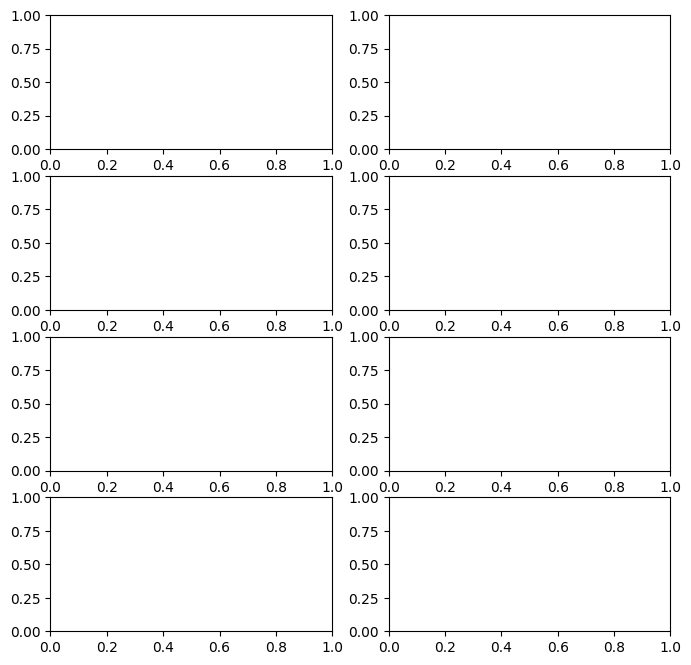

In [26]:
plt.subplots(4, 2, figsize=(8, 8))
for i, column in enumerate(numeric_columns[[1, 3, 5, 7, 9, 16, 18, 22]]):
  plt.subplot(4, 2, i+1)
  if column == 'total_tarifa':
    sns.histplot(df_eda[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
  else:
    sns.barplot(df_eda[column].value_counts())
    plt.title(f'Distribution of {column}')
    plt.ylabel('')


plt.tight_layout()
plt.show()

### Categorical variables

In [40]:
for i, col in enumerate(categorical_columns):
  print(f"{i}:\t{col}")

0:	nombre_programa
1:	nombre_paquete
2:	nombre_segmento
3:	nombre_agencia
4:	ciudad_agencia
5:	entidad_federativa_agencia
6:	pais_agencia
7:	nombre_empresa
8:	nombre_tipo_habitacion
9:	clasificacion_tipo_habitacion
10:	nombre_canal
11:	nombre_pais_origen
12:	nombre_estatus_reservacion
13:	clave_estado
14:	nombre_estado


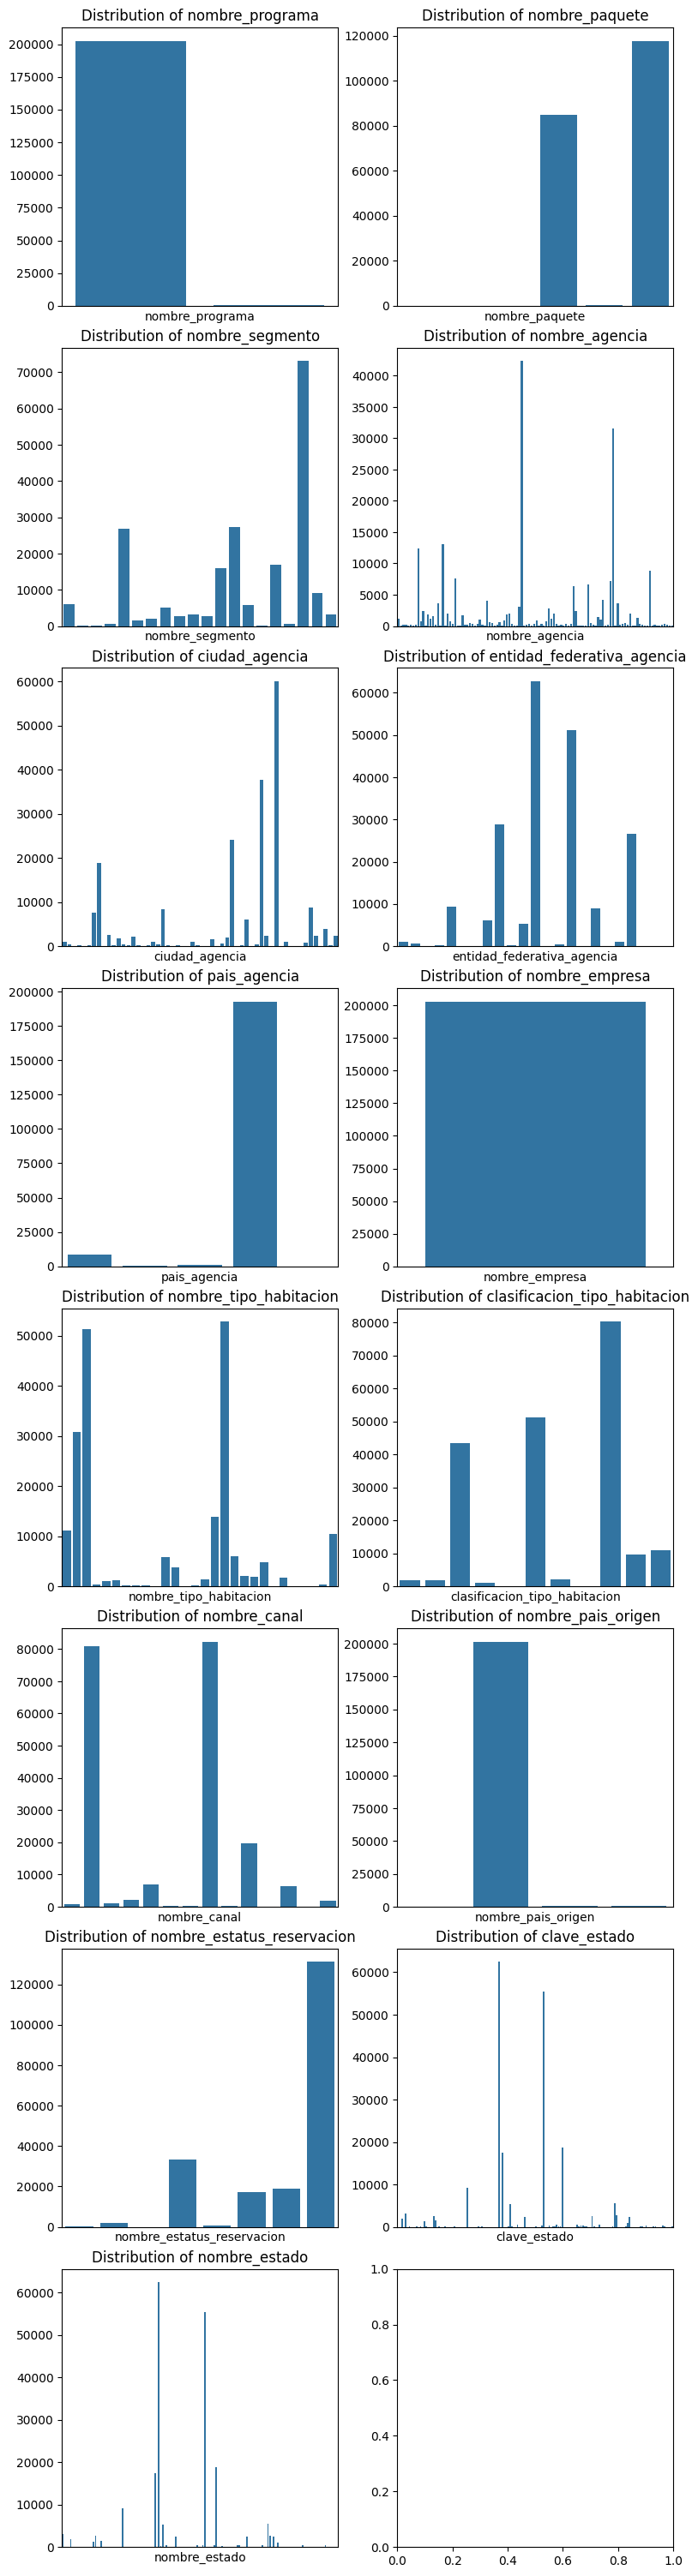

In [72]:
plt.subplots(8, 2, figsize=(8, 30))
for i, column in enumerate(categorical_columns):
  plt.subplot(8, 2, i+1)
  sns.barplot(df_eda[column].value_counts())
  plt.title(f'Distribution of {column}')
  plt.xticks([])
  plt.ylabel('')


plt.tight_layout(pad=0.5)
plt.show()

For more details, please refer to the profile report. We've hidden the ticks for better viewing.

### Bool variables

In [53]:
for i, col in enumerate(bool_columns):
  print(f"{i}:\t{col}")

0:	reservacion_pendiente
1:	reservacion
2:	reservacion_anio_anterior


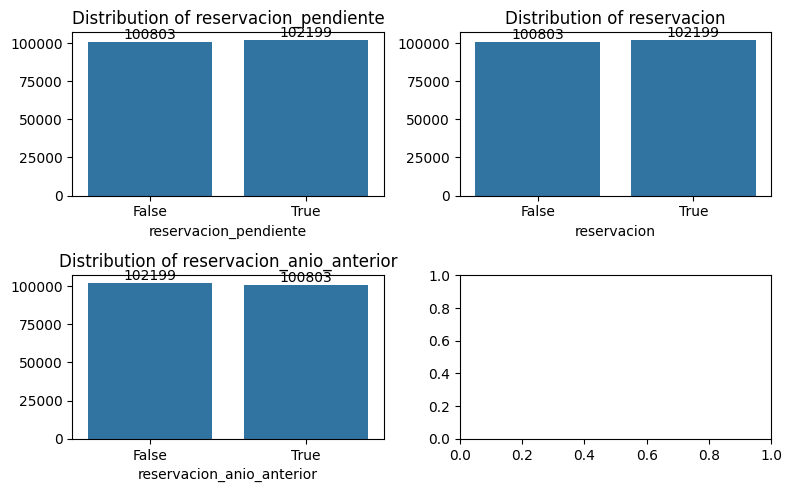

In [71]:
plt.subplots(2, 2, figsize=(8, 5))
for i, column in enumerate(bool_columns):
  plt.subplot(2, 2, i+1)
  ax =sns.barplot(df_eda[column].value_counts())
  plt.title(f'Distribution of {column}')
  ax.bar_label(ax.containers[0], fontsize=10);
  plt.ylabel('')


plt.tight_layout(pad=1)
plt.show()

### Datetime columns

## EDA - Bivariate

### Correlation matrix

Only for categorical variables, because numeric variables are identifiers.

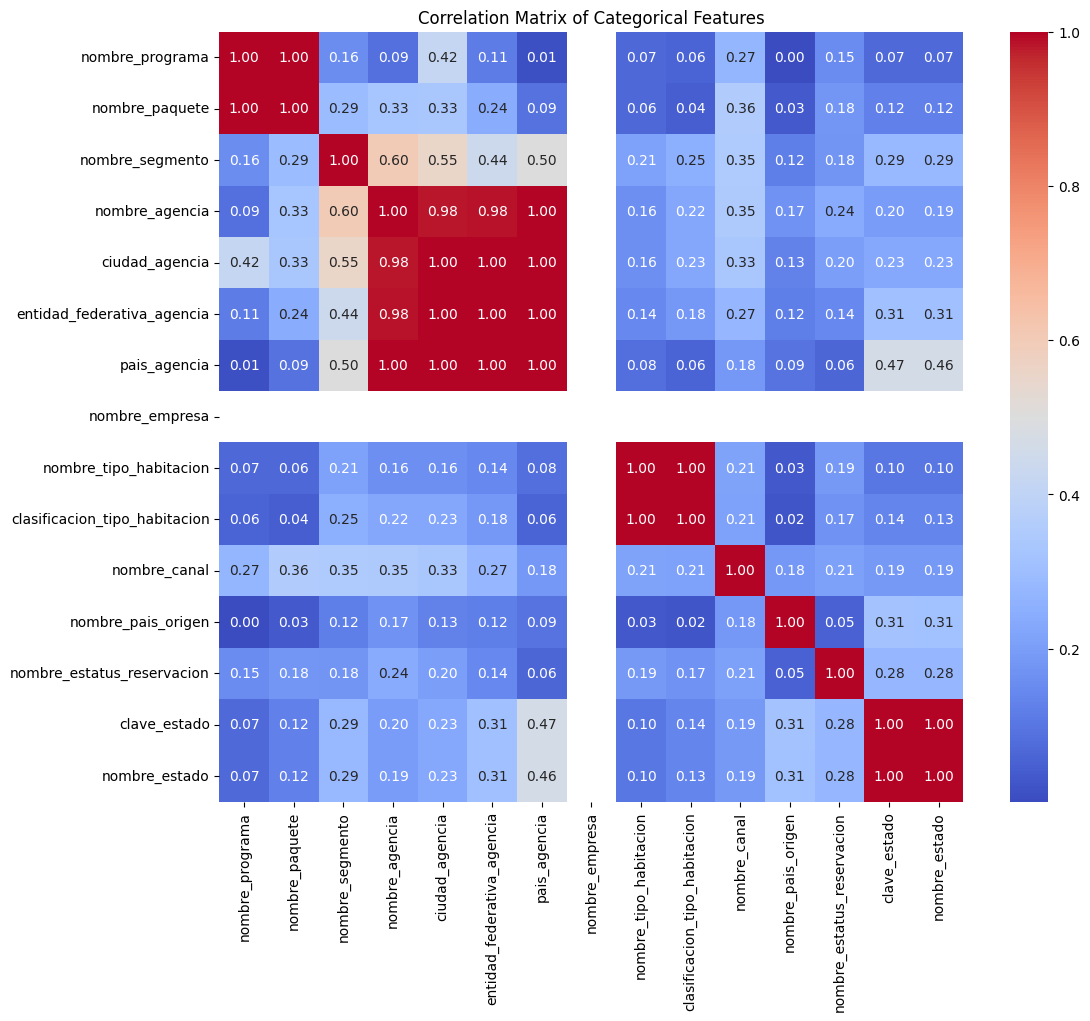

In [79]:
# Correlation matrix for categorical variables using Cramer's V
import warnings
warnings.filterwarnings('ignore') #'default' for activation

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

cols = categorical_columns

corr_matrix = pd.DataFrame(index=cols, columns=cols)

for col1 in cols:
    for col2 in cols:
      corr_matrix.loc[col1, col2] = cramers_v(df_eda[col1], df_eda[col2])

# Convert the correlation matrix values to numeric
corr_matrix = corr_matrix.astype(float)

# Display the correlation matrix
#print(corr_matrix)

# Plotting the correlation matrix (optional)
# plt.figure(figsize=(12, 10))
# sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
# plt.title("Correlation Matrix of Categorical Variables (Cramer's V)")
# plt.show()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Categorical Features')
plt.show()

We cannot find significant correlations, the only ones are variables from the same table, assigned to the same identifier

### Boxplots

**Total Tarifa by Categorical variables**

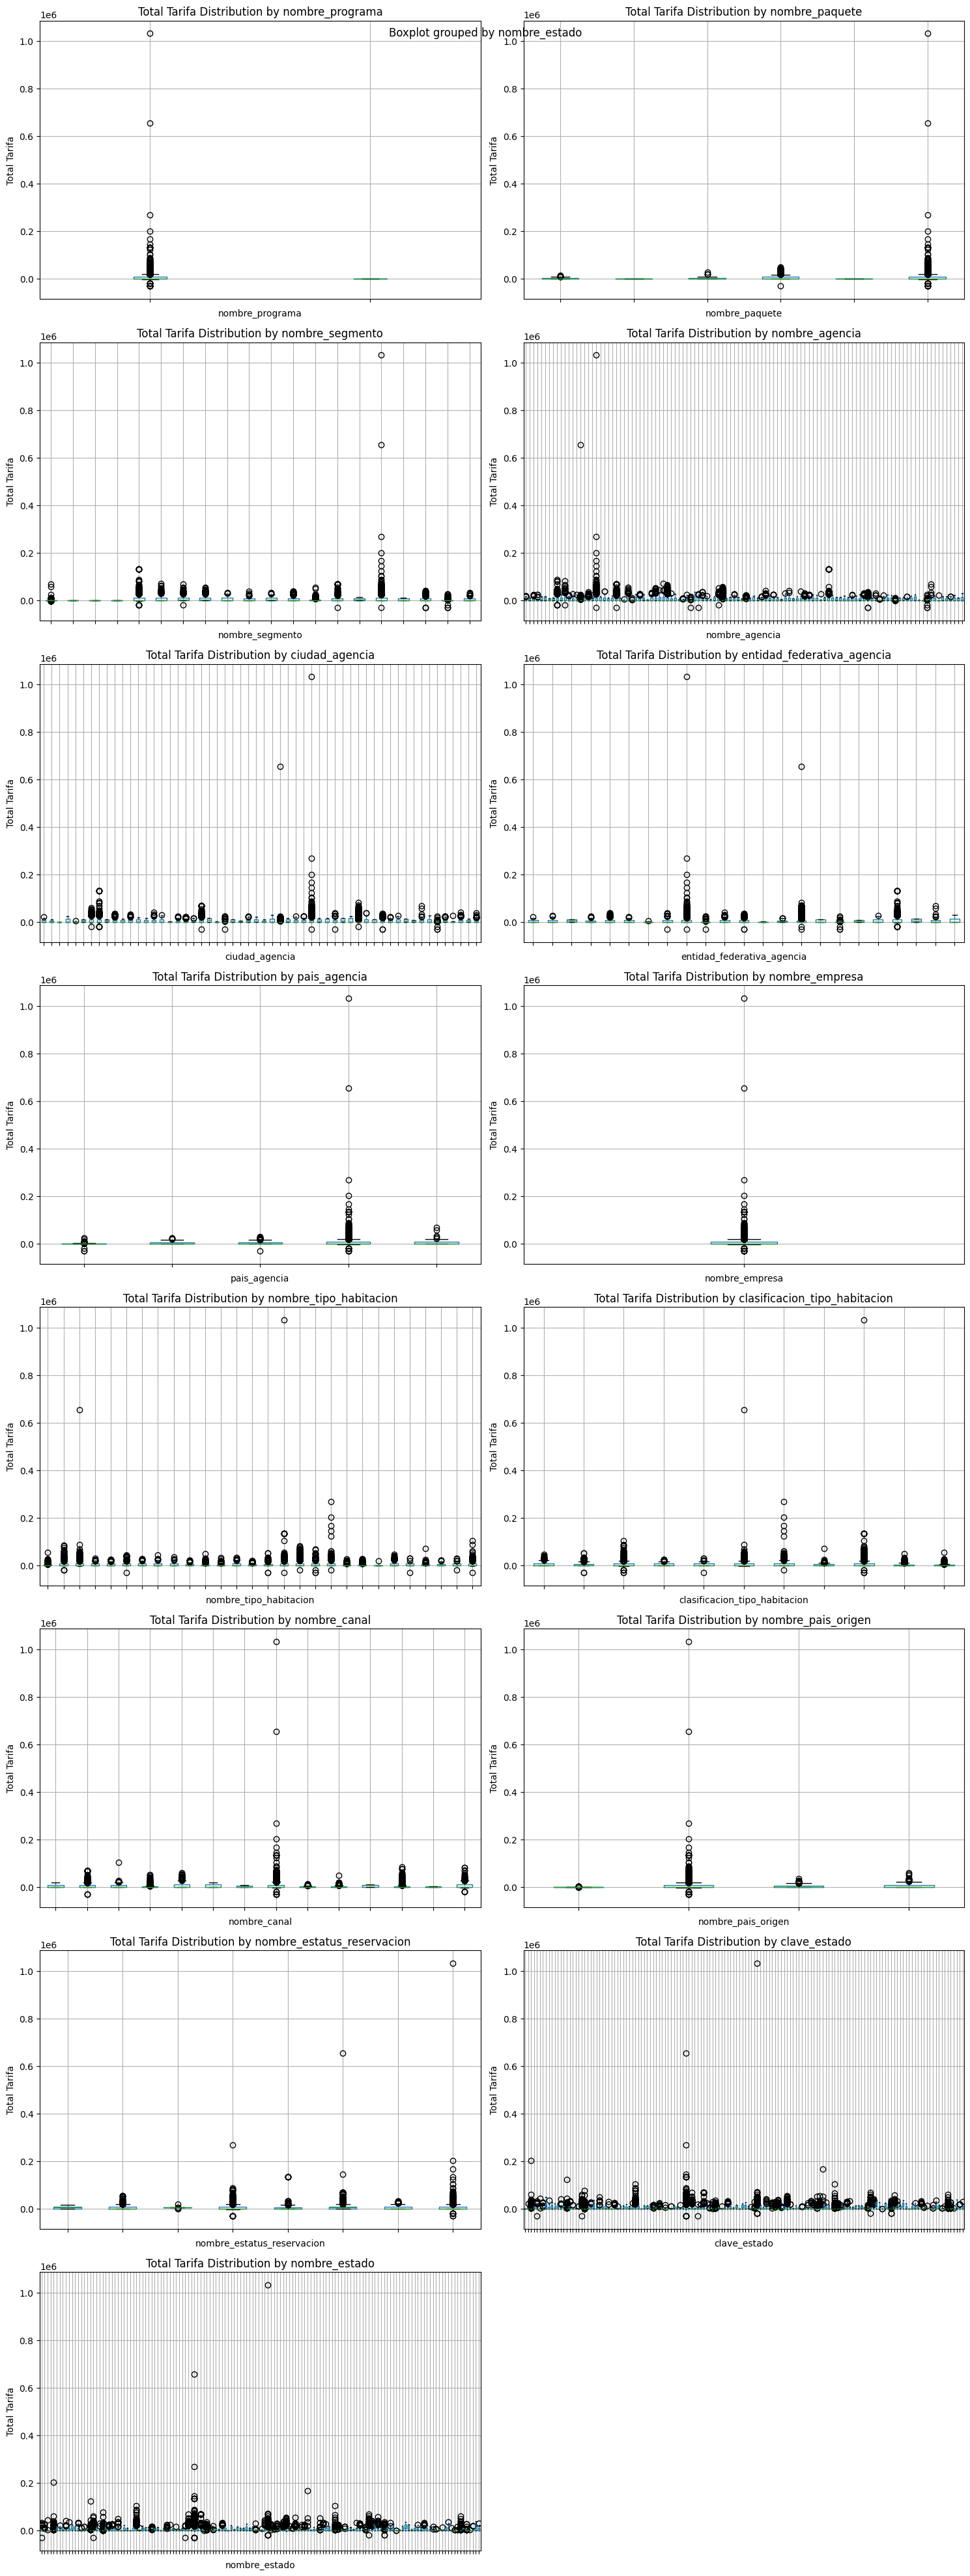

In [86]:
import matplotlib.pyplot as plt
import numpy as np

num_cols = 2  # Number of columns in the subplot grid
num_rows = int(np.ceil(len(categorical_columns) / num_cols))  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust figsize as needed
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing between subplots

for i, column in enumerate(categorical_columns):
    row = i // num_cols  # Calculate row index
    col = i % num_cols  # Calculate column index
    ax = axes[row, col]  # Get the current subplot

    df_eda.boxplot(column='total_tarifa', by=column, ax=ax)  # Create boxplot on the subplot
    ax.set_title(f'Total Tarifa Distribution by {column}')
    ax.set_ylabel('Total Tarifa')
    ax.set_xticklabels([])  # Rotate x-axis labels

# Remove any empty subplots
for i in range(len(categorical_columns), num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

plt.tight_layout()
plt.show()

### Bool variables

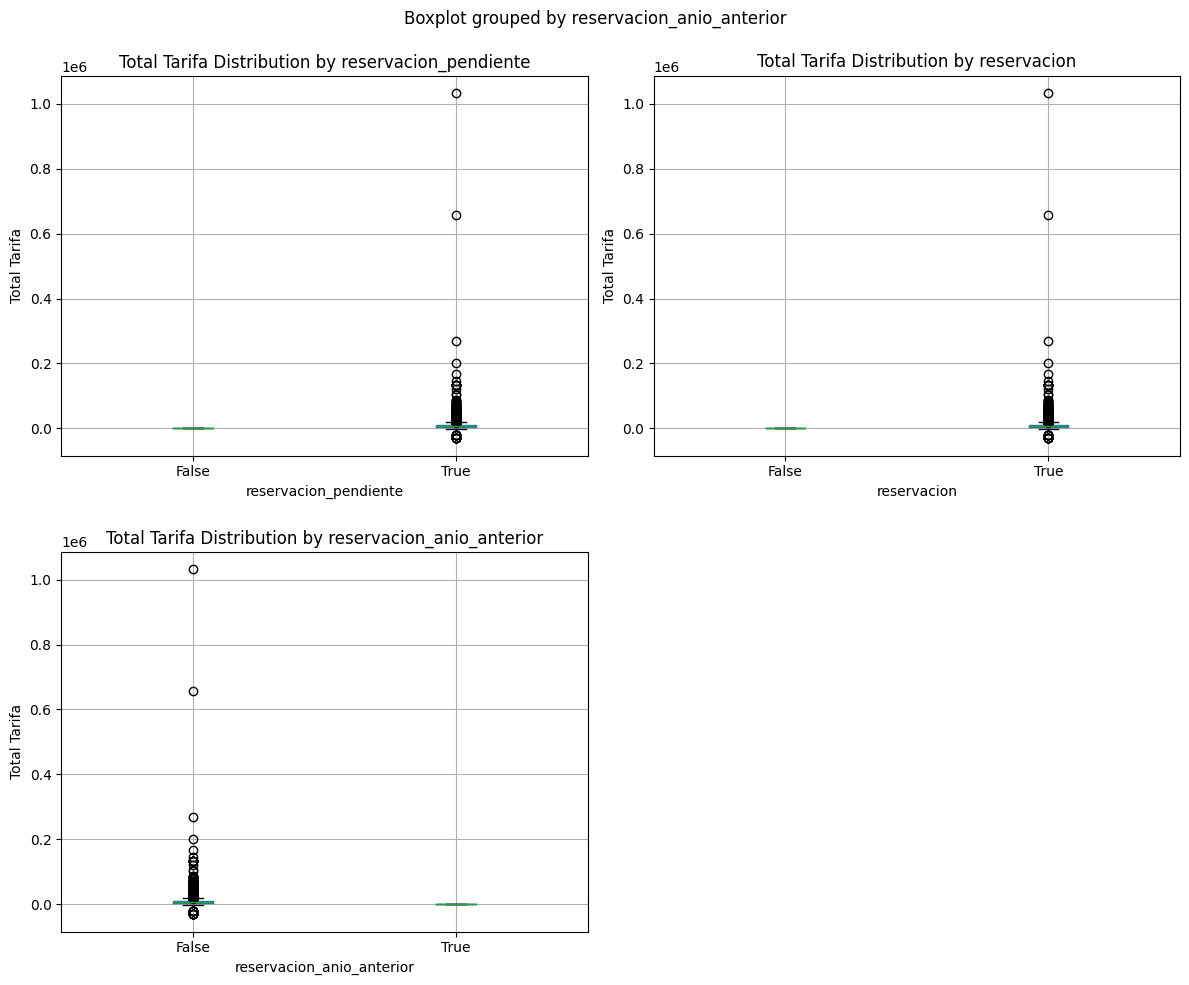

In [87]:
import matplotlib.pyplot as plt
import numpy as np

num_cols = 2  # Number of columns in the subplot grid
num_rows = int(np.ceil(len(bool_columns) / num_cols))  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))  # Adjust figsize as needed
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing between subplots

for i, column in enumerate(bool_columns):
    row = i // num_cols  # Calculate row index
    col = i % num_cols  # Calculate column index
    ax = axes[row, col]  # Get the current subplot

    df_eda.boxplot(column='total_tarifa', by=column, ax=ax)  # Create boxplot on the subplot
    ax.set_title(f'Total Tarifa Distribution by {column}')
    ax.set_ylabel('Total Tarifa')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')  # Adjust x-axis labels for boolean

# Remove any empty subplots
for i in range(len(bool_columns), num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

plt.tight_layout()
plt.show()